# CAB330 Case Study 1: Organics

A supermarket has just begun offering a line of organic products.

The supermarket has a customer loyalty program.

The supermarket provided coupons for the organic products to loyalty members.

This is their story.

---

__*Your task is to determine which customers are likely to purchase recently offered organic products.*__

---

Class: CAB330

Student: Christopher Ayling || christopher.ayling@connect.qut.edu.au

Due Date: 10th September 2018

Project Demo: Week 8 Lab

Weighting: 25%

---
## Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [47]:
# Manipulating Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG, Image
import graphviz

# Algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.model_selection import GridSearchCV

In [3]:
np.random.seed(330)

---
## Data Loading

In [4]:
organics = pd.read_csv("./organics.csv")
organics.head()

,CUSTID,GENDER,DOB,EDATE,AGE,AGEGRP1,AGEGRP2,TV_REG,NGROUP,NEIGHBORHOOD,LCDATE,ORGANICS,BILL,REGION,CLASS,ORGYN,AFFL,LTIME
0,140,U,1921-09-16,1998-02-23,76.0,60-80,70-80,Wales & West,C,16.0,1994-11-07,0,16000.00,Midlands,Gold,0,10.0,4.0
1,620,U,1949-02-12,1998-02-23,49.0,40-60,40-50,Wales & West,D,35.0,1993-06-04,0,6000.00,Midlands,Gold,0,4.0,5.0
2,868,F,1927-11-27,1998-02-23,70.0,60-80,70-80,Wales & West,D,27.0,1990-08-02,1,0.02,Midlands,Silver,1,5.0,8.0
3,1120,M,1932-04-10,1998-02-23,65.0,60-80,60-70,Midlands,F,51.0,1991-07-01,1,0.01,Midlands,Tin,1,10.0,7.0
4,2313,F,1929-05-21,1998-02-23,68.0,60-80,60-70,Midlands,A,4.0,1990-03-01,0,0.01,Midlands,Tin,0,11.0,8.0


In [5]:
rows, columns = organics.shape; rows, columns

(22223, 18)

---
## Task 1. Data Selection and Distribution.

(4 marks)

### Variable Descriptions

The following information would assist you in assigning the variables roles:

* Varibles DOB, AGE, AGEGRP1, and AGEGRP2 are all different measurements for the same information.

* Variable NGROUP contains collapsed levels of the variable NEIGHBORHOOD

* Variables LCDATE and LTIME represent the same information in two different formats.

* There are two target variables, namely ORGANICS and ORGYN, with different types. Choose the target which suits the task.

In [375]:
red = 'background-color: Tomato'
green = 'background-color: MediumSeaGreen'
blue = 'background-color: DodgerBlue'
sblue = 'background-color: SlateBlue'
violet = 'background-color: Violet'
gray = 'background-color: Lightgray'
orange = 'background-color: Orange'

In [350]:
def highlight_useful(val):
    """ highlight True as green, false as red """
    return '' if val is None else green if val else red

In [371]:
def highlight_type(val):
    """ highlight based on variable type """
    return blue if val == 'categorical' else sblue if val == 'numerical' else ''

In [373]:
def highlight_target(val):
    """ highlight if target variable """
    return orange if val else gray

In [364]:
descriptions = {
    "CUSTID": ["Customer Identifcation Number", False, False, 'categorical'],
    "GENDER": ["M = male. F = Female, U = unknown", False, False, 'categorical'],
    "DOB": ["Date of birth", False, False, 'numerical'],
    "EDATE": ["Date extracted from the daily sales database", False, False, 'numerical'],
    "AGE": ["Age, in years", True, True, 'numerical'],
    "AGEGRP1": ["Age group 1", False, False, 'numerical'],
    "AGEGRP2": ["Age group 2", False, False, 'numerical'],
    "TV_REG": ["Television Region", True, True, 'categorical'],
    "NGROUP": ["Neighborhood group", True, True, 'categorical'],
    "NEIGHBORHOOD": ["Type of residential neighborhood", True, True, 'categorical'],
    "LCDATE": ["Loyalty card application due", False, False, 'numerical'],
    "LTIME": ["Time as loyalty card member", True, True, 'numerical'],
    "ORGANICS": ["Number of organic products purchased", True, True, 'numerical', True],
    "BILL": ["Total amount spent", True, True, 'numerical'],
    "REGION": ["Geographic Region", True, True, 'categorical'],
    "CLASS": ["Customer loyalty status: tin, silver, gold, platinum", True, True, 'categorical'],
    "ORGYN": ["Organics Purchased? 1 = Yes, 0 = No", True, True, 'categorical', True],
    "AFFL": ["Affluence grade on a scale from 1 to 30", True, True, 'numerical']
}

In [379]:
COLUMN_INFORMATION = pd.DataFrame.from_dict(descriptions, orient='index')
COLUMN_INFORMATION.columns = ['Description', 'For Classification', 'For Regression', 'Variable Type', 'Target']
COLUMN_INFORMATION = COLUMN_INFORMATION[['Description', 'Target', 'Variable Type', 'For Classification', 'For Regression']]
COLUMN_INFORMATION['Target'] = COLUMN_INFORMATION['Target'].apply(lambda cell: bool(cell))

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
    display(
        COLUMN_INFORMATION.style.\
            applymap(highlight_useful, subset=['For Classification', 'For Regression']).\
            applymap(highlight_type, subset='Variable Type').\
            applymap(highlight_target, subset='Target')
    )

,Description,Target,Variable Type,For Classification,For Regression
CUSTID,Customer Identifcation Number,False,categorical,False,False
GENDER,"M = male. F = Female, U = unknown",False,categorical,False,False
DOB,Date of birth,False,numerical,False,False
EDATE,Date extracted from the daily sales database,False,numerical,False,False
AGE,"Age, in years",False,numerical,True,True
AGEGRP1,Age group 1,False,numerical,False,False
AGEGRP2,Age group 2,False,numerical,False,False
TV_REG,Television Region,False,categorical,True,True
NGROUP,Neighborhood group,False,categorical,True,True
NEIGHBORHOOD,Type of residential neighborhood,False,categorical,True,True


### 1.1 What is the proportion of individuals who purchased organic products?

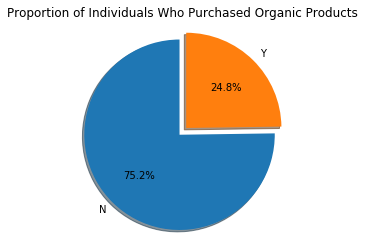

In [7]:
buyer_counts = organics['ORGYN'].value_counts()
buyer_counts.index = ['Y' if index else 'N' for index in buyer_counts.index]
plt.pie(buyer_counts, labels=buyer_counts.index, startangle=90, shadow=True, explode=(0, 0.1), autopct='%1.1f%%')
plt.title("Proportion of Individuals Who Purchased Organic Products")
plt.axis('equal')
plt.show()

### Dropping Unused Variables

In [8]:
unused = []
organics.drop(labels=unused, inplace=True)

### Cleaning Data

In [9]:
# Columns with NAs: AGE, 

In [91]:
# filling age NAs
organics['AGE'].fillna(organics['AGE'].mean(), inplace=True)

In [ ]:
pa

### Train / Val / Test Split

In [10]:
def split_labels(n: int, test_size=0.2, val_size=0.2):
    """ return a list containing train/test/val labels """
    t = int(n * test_size)
    v = int(n * val_size)
    labels = np.zeros(n)
    labels[:t] = 1
    labels[t:t+v] = 2
    labels = ['test' if el==1 else 'val' if el==2 else 'train' for el in labels]
    np.random.shuffle(labels)
    return labels

---
## Task 2. Predictive Modeling Using Decision Trees

(4 marks)

In [63]:
def visualise_tree(dt, feature_names=None, class_names=None):
    """ visualise a decision tree in a Jupyter notebook """
    graph = graphviz.Source(export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names=feature_names, class_names=class_names))
    display(SVG(graph.pipe(format='svg')))

### 2.1 Build a decision tree using default setting. 

In [239]:
features = ['AGE', 'BILL']

X = np.column_stack([organics[feature] for feature in features])

y = np.array(organics['ORGYN'])

Xtr, Xte, ytr, yte = train_test_split(X, y)

In [240]:
dt = DecisionTreeClassifier()

In [241]:
dt.fit(Xtr, ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### a. What is the classification accuracy on training and test datasets?

In [243]:
pd.DataFrame([dt.score(Xtr, ytr), dt.score(Xte, yte)], columns=['Accuracy'], index=['Train', 'Test'])

,Accuracy
Train,0.836143
Test,0.754500


#### b. Which variable is used for the first split? What are the competing splits for the first split?

In [244]:
importances = pd.DataFrame(dt.feature_importances_, columns=['Importance'], index=features)
importances

,Importance
AGE,0.541325
BILL,0.458675


In [246]:
# visualise_tree(dt, feature_names=['AGE', 'BILL'], class_names=[str(bool(c)) for c in dt.classes_])

#### c. What are the 5 important variables in building the tree?

In [247]:
importances[:5]

,Importance
AGE,0.541325
BILL,0.458675


#### d. Report if you see any evidence of model overfitting.

There is model overfitting. This is evidenced by the higher train set accuracy.

### 2.2 Build another decision tree tuned with GridSearchCV.

In [248]:
parameters = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [None, 2, 5, 10, 15],
    "min_samples_split": [0.2, 0.4, 0.6, 0.8],
    "min_samples_leaf": [1, 20, 50, 80, 100]
}

In [249]:
gs_dt = GridSearchCV(DecisionTreeClassifier(), parameters).fit(Xtr, ytr)

#### a. What is the classification accuracy on training and test datasets?

In [250]:
gs_dt.score(Xtr, ytr), gs_dt.score(Xte, yte)

(0.7814243715125697, 0.7809575233981282)

#### b. What are the parameters used? Explain your decision.

In [251]:
print(f"Parameters used: {list(parameters.keys())}")

Parameters used: ['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf']


Explanation

#### c. What are the optimal parameters for this decision tree?

In [252]:
gs_dt.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.2}

In [253]:
gs_dt.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

#### d. Which variable is used for the first split? What are the competing splits for this first split?

In [255]:
importances = pd.DataFrame(gs_dt.best_estimator_.feature_importances_, columns=['Importance'], index=features)
importances

,Importance
AGE,0.991606
BILL,0.008394


#### e. What are the 5 important variables in building the tree?

In [256]:
importances = pd.DataFrame(gs_dt.best_estimator_.feature_importances_, columns=['Importance'], index=features)
importances[:5]

,Importance
AGE,0.991606
BILL,0.008394


#### f. Report if you see an evidence of model overfitting.

There is no evidence of model overfitting, the accuracy on the train and test splits is comparable.

---
## Task 3. Predictive Modeling Using Regression

(5.5 marks)

### 1. Apply transformation/scaling methods to variables.

In [257]:
# apply 

In [262]:
# list affected variables

### 2. Build regression models (with and without GridSearchCV)

#### a. Report which variables are included in the regression model.

#### b. Report the top-5 important variables.

#### c. Report any sign of overfitting.

#### d. What are the parameters used?

In [259]:
# explain your decision

In [260]:
# What are the optimal parameters

In [261]:
# Which regression function is being used?

#### e. What is the classification accuracy on training and test datasets?

---
## Task 4. Predictive Modeling Using Neural Networks

(5.5 marks)

### 1. Build a Neural Network model using the default setting.

#### a. What is the network architecture of the model?

#### b. How many iterations are needed to train this network?

#### c. Do you see any sign of over-fitting?

#### d. Did the training process converge and result in the best model?

#### e. What is the classification accuracy on the training and test datasets?

### 2. Refine this network by refining is with GridSearchCV.

In [ ]:
# What parameters are used?

In [ ]:
# Explain your decision.

### 3. Build  another Neural Network with inputs selected from RFE with regression.

(Use the best model generated in Task 3) and selection with decision tree (use the best model from Task 2).

#### a. Did feature selection help here? Any changes in network architecture? What inputs are being used?

#### b. What is the classification accuracy on the train and test datasets? Any improvements?

#### c. How many iteration are needed to train this network?

#### d. Do you see any sign of over-fitting?

#### e. Did the training process converge and result in the best model?

#### f. Use GridSearchCV to tune the network to see whether the change in network architecture can further improve the performance.

### 3. Using the comparison methods, Which appears to be better?

From the better model, can you identify which customers to target? Can you provide some descriptive summary of those customers?

---
## Task 5. Comparing Predictive Models

(4 marks)

### 1. Using the comparison methods to compare the best decsision tree model, the best regression model...

#### a. Discuss the findings led by (a) ROC Chart and Index; (b) Accuracy Score; (c) Classification Report.

#### b. Do all the mdoels agree on the customers' characteristics? How do they vary?

### 2. Finally, based on all models and analysis, is there a particular model you will use in decision making?

### 3. Can you summarise positives and negaitives of each modelling method based on this analysis?

## Conclusion

In conclusion ...